In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
#from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
from google.colab import drive
import pandas as pd

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define the file path
file_path = '/content/drive/My Drive/SMSSpamCollection.txt'  # Update this path if your file is located elsewhere

# Step 3: Load the data into a pandas DataFrame
data = pd.read_table(file_path, sep='\t', names=['v1', 'v2'])

# Step 4: Display the first few rows of the DataFrame
print(data.head())

Mounted at /content/drive
     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [3]:
# shape method gives the shape of dataframe
data.shape

(5572, 2)

In [4]:
data.describe(include='all')

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
#describe data by group - use pandas groupby('v1').describe() method
data.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

In [6]:
#Calculating the length of all the messages
data['length']=data['v2'].apply(len)
data.head()

,v1,v2,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [7]:
data.head()

,v1,v2,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [8]:
data.describe()

,length
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


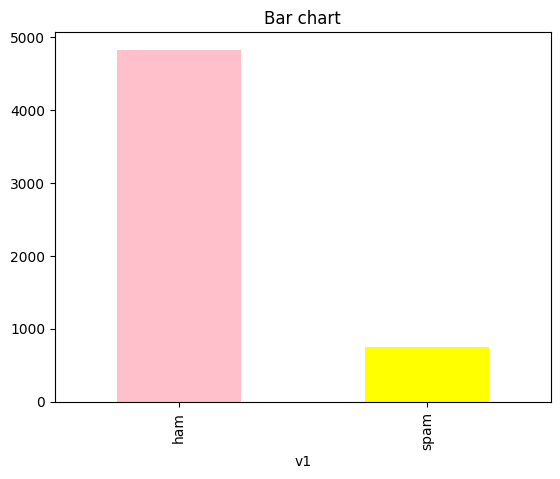

In [9]:
count_Class=pd.value_counts(data["v1"], sort= True)
count_Class.plot(kind= 'bar', color= ["pink", "yellow"])
plt.title('Bar chart')
plt.show()

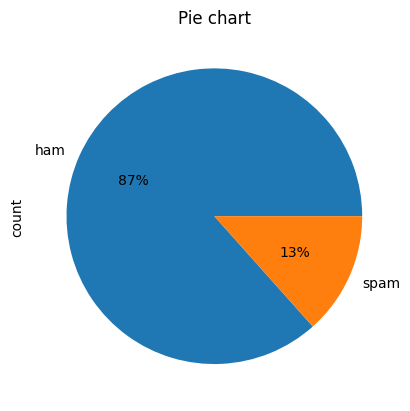

In [10]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.show()

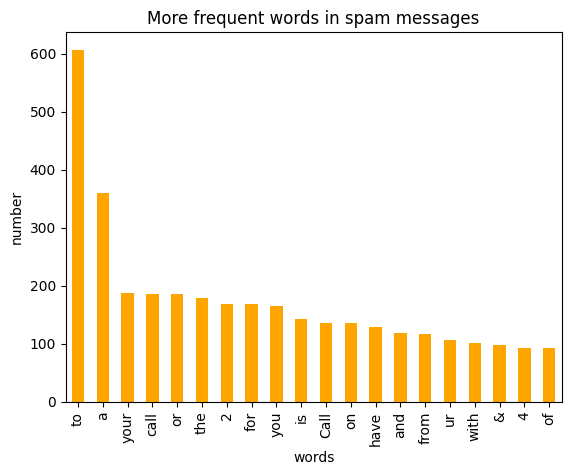

In [11]:
#import counter function
from collections import Counter

#using counter
count1 = Counter(" ".join(data[data['v1']=='spam']["v2"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in spam", 1 : "count_"})
df1.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df1["words in spam"]))
plt.xticks(y_pos, df1["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

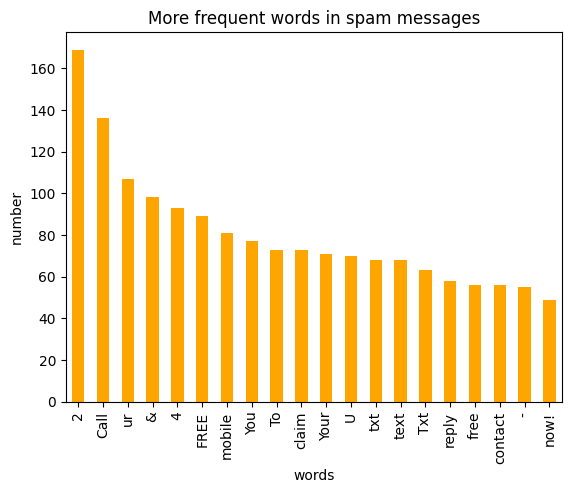

In [12]:
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS
#removing the stop-words from the messages(complete dataset)
data['v2']=data['v2'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
## todo: rewrite the counter code here, and check the most frequent words
#using counter
count1 = Counter(" ".join(data[data['v1']=='spam']["v2"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in spam", 1 : "count_"})
df1.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df1["words in spam"]))
plt.xticks(y_pos, df1["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

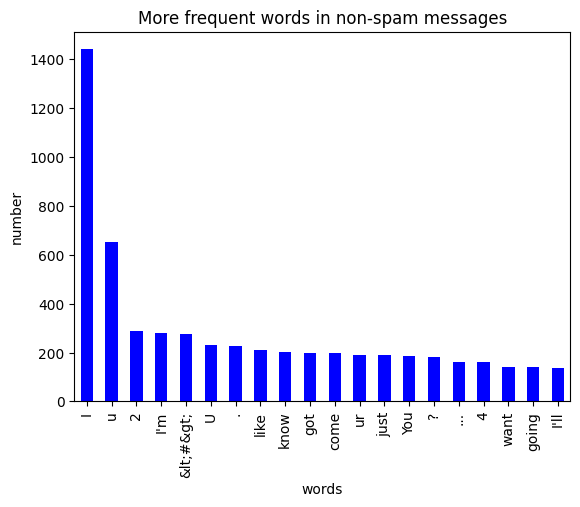

In [13]:
##todo:Do the same for finding most frequent words in Non-Spam messages:

#note: stop words are already removed from all ham/spam sentences

#using counter
count2 = Counter(" ".join(data[data['v1']=='ham']["v2"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in non-spam", 1 : "count_"})
df2.plot.bar(legend = False, color = 'blue')
y_pos = np.arange(len(df2["words in non-spam"]))
plt.xticks(y_pos, df2["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
(1, 8)
<class 'scipy.sparse._csr.csr_matrix'>
[[1 1 1 1 1 1 1 2]]


In [15]:
#todo : vectorise the messages

from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = data['v2']
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
#print the vocalbulary - very large
# print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

(5572, 8675)
<class 'scipy.sparse._csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [16]:
data.head()

,v1,v2,length
0,ham,"Go jurong point, crazy.. Available bugis n gre...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...,155
3,ham,U dun say early hor... U c say...,49
4,ham,"Nah I don't think goes usf, lives",61


In [17]:
data['label_num']=data.v1.map({'ham':0,'spam':1})
data.head()

,v1,v2,length,label_num
0,ham,"Go jurong point, crazy.. Available bugis n gre...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...,155,1
3,ham,U dun say early hor... U c say...,49,0
4,ham,"Nah I don't think goes usf, lives",61,0


In [18]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(vector, data['label_num'], test_size=0.33, random_state=42)

In [19]:
print(y_train[:5])

3235    0
945     0
5319    0
5528    0
247     0
Name: label_num, dtype: int64


In [20]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [21]:
#Loading all classifier
svc = SVC(kernel = 'linear')
mnb = MultinomialNB(alpha =0.2)
gnb  = GaussianNB()
lr = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=100,random_state=11)
abc = AdaBoostClassifier(n_estimators =100,random_state=11)

In [22]:
#defining functions for training and testing data

def training(clf,X_train,y_train):
    clf.fit(X_train,y_train)

#function for predicting labels

def predict(clf,X_test):
    return clf.predict(X_test)

In [23]:
#defining a dictionary of classifier
classifier={'SVM': svc , 'MultinomialNB': mnb,'GaussianNB': gnb,'logistic': lr,'RandomForest': rfc,'Adaboost': abc}

In [24]:
#predict and storing score of each classifier
score = []
for n,c in classifier.items():
    training(c,X_train.toarray(),y_train)
    pred = predict(c,X_test.toarray())
    score.append((n,accuracy_score(y_test,pred),precision_score(y_test,pred),recall_score(y_test,pred),f1_score(y_test,pred)))

In [25]:
print(score)

[('SVM', 0.9891245241979336, 0.9956140350877193, 0.9227642276422764, 0.9578059071729957), ('MultinomialNB', 0.9804241435562806, 0.8917910447761194, 0.9715447154471545, 0.9299610894941635), ('GaussianNB', 0.9053833605220228, 0.5932642487046632, 0.9308943089430894, 0.7246835443037974), ('logistic', 0.9809679173463839, 0.9606986899563319, 0.8943089430894309, 0.9263157894736842), ('RandomForest', 0.977705274605764, 1.0, 0.8333333333333334, 0.9090909090909091), ('Adaboost', 0.9200652528548124, 0.8666666666666667, 0.47560975609756095, 0.6141732283464567)]


In [26]:
score_df=pd.DataFrame(score,columns=['classifier','acc','precision','recall','f1_score'])
#Adding accuracy column
score_df['Accuracy (%)']=score_df['acc']*100
score_df

,classifier,acc,precision,recall,f1_score,Accuracy (%)
0,SVM,0.989125,0.995614,0.922764,0.957806,98.912452
1,MultinomialNB,0.980424,0.891791,0.971545,0.929961,98.042414
2,GaussianNB,0.905383,0.593264,0.930894,0.724684,90.538336
3,logistic,0.980968,0.960699,0.894309,0.926316,98.096792
4,RandomForest,0.977705,1.000000,0.833333,0.909091,97.770527
5,Adaboost,0.920065,0.866667,0.475610,0.614173,92.006525


In [27]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=score_df)

https://docs.google.com/spreadsheets/d/1R6TJcxDhAurUWD8dSmcX0NFwppFfITmmATzCDrOY_6k/edit#gid=0


In [28]:
m_confusion_test = metrics.confusion_matrix(y_test, svc.predict(X_test.toarray()))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0(ham)', 'Predicted 1(spam)'],
            index = ['Actual 0(ham)', 'Actual 1(spam)'])

,Predicted 0(ham),Predicted 1(spam)
Actual 0(ham),1592,1
Actual 1(spam),19,227


In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt